### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
### Implimantions:
Task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Import Most basic Library

In [2]:
df_avocado=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df_avocado

Unnamed: 0        Date  AveragePrice  ...          type    year  region
0             0.0  27-12-2015          1.33  ...  conventional  2015.0  Albany
1             1.0  20-12-2015          1.35  ...  conventional  2015.0  Albany
2             2.0  13-12-2015          0.93  ...  conventional  2015.0  Albany
3             3.0  06-12-2015          1.08  ...  conventional  2015.0  Albany
4             4.0  29-11-2015          1.28  ...  conventional  2015.0  Albany
...           ...         ...           ...  ...           ...     ...     ...
16463         NaN         NaN           NaN  ...           NaN     NaN     NaN
16464         NaN         NaN           NaN  ...           NaN     NaN     NaN
16465         NaN         NaN           NaN  ...           NaN     NaN     NaN
16466         NaN         NaN           NaN  ...           NaN     NaN     NaN
16467         NaN         NaN           NaN  ...           NaN     NaN     NaN

[16468 rows x 14 columns]

In [3]:
df_avocado.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [4]:
df_avocado.dropna(axis=0, inplace=True)
df_avocado

Unnamed: 0        Date  AveragePrice  ...          type    year     region
0            0.0  27-12-2015          1.33  ...  conventional  2015.0     Albany
1            1.0  20-12-2015          1.35  ...  conventional  2015.0     Albany
2            2.0  13-12-2015          0.93  ...  conventional  2015.0     Albany
3            3.0  06-12-2015          1.08  ...  conventional  2015.0     Albany
4            4.0  29-11-2015          1.28  ...  conventional  2015.0     Albany
...          ...         ...           ...  ...           ...     ...        ...
1512        10.0  16-10-2016          1.39  ...  conventional  2016.0  Charlotte
1513        11.0  09-10-2016          1.51  ...  conventional  2016.0  Charlotte
1514        12.0  02-10-2016          1.48  ...  conventional  2016.0  Charlotte
1515        13.0  25-09-2016          1.47  ...  conventional  2016.0  Charlotte
1516        14.0  18-09-2016          1.43  ...  conventional  2016.0  Charlotte

[1517 rows x 14 columns]

In [5]:
df_avocado.drop('Unnamed: 0',axis=1,inplace=True)

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it

In [6]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


Great! now lets use the info() methode to get an a general idea about our data. as a first observation we can see that we are lucky, we dont have any missing values (1517 complete data) and 14 columns. Now let's do some Feature Engineering on the Date Feature so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [7]:
df_avocado['Date']=pd.to_datetime(df_avocado['Date'])
df_avocado['Year']=df_avocado['Date'].apply(lambda x:x.year)
df_avocado['Month']=df_avocado['Date'].apply(lambda x:x.month)
df_avocado['Day']=df_avocado['Date'].apply(lambda x:x.day)
df_avocado

Date  AveragePrice  Total Volume  ...  Year  Month  Day
0    2015-12-27          1.33      64236.62  ...  2015     12   27
1    2015-12-20          1.35      54876.98  ...  2015     12   20
2    2015-12-13          0.93     118220.22  ...  2015     12   13
3    2015-06-12          1.08      78992.15  ...  2015      6   12
4    2015-11-29          1.28      51039.60  ...  2015     11   29
...         ...           ...           ...  ...   ...    ...  ...
1512 2016-10-16          1.39     190846.01  ...  2016     10   16
1513 2016-09-10          1.51     178235.75  ...  2016      9   10
1514 2016-02-10          1.48     178410.82  ...  2016      2   10
1515 2016-09-25          1.47     189131.52  ...  2016      9   25
1516 2016-09-18          1.43     182978.30  ...  2016      9   18

[1517 rows x 16 columns]

Seprate Date month and year from Date colume and made dtype integer.

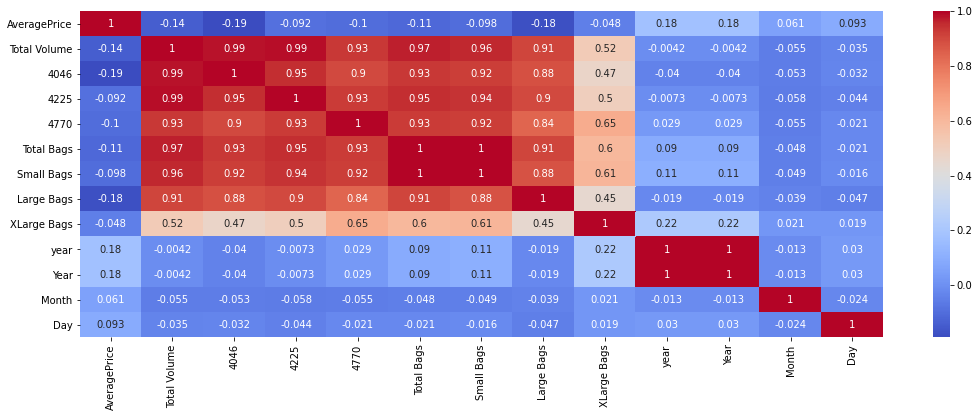

In [8]:
plt.figure(figsize=(18,6))
sns.heatmap(df_avocado.corr(),cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not corroleted with the Average Price column, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model.

In [9]:
df_avocado['region'].nunique()

51

In [10]:
df_avocado['type'].nunique()

1

Type colume have unique valu so it will not effect out put need to drop column

In [11]:
df_avocado=pd.get_dummies(df_avocado.drop(['region','Date','type','year'],axis=1),drop_first=True)
df_avocado

AveragePrice  Total Volume      4046  ...  Year  Month  Day
0             1.33      64236.62   1036.74  ...  2015     12   27
1             1.35      54876.98    674.28  ...  2015     12   20
2             0.93     118220.22    794.70  ...  2015     12   13
3             1.08      78992.15   1132.00  ...  2015      6   12
4             1.28      51039.60    941.48  ...  2015     11   29
...            ...           ...       ...  ...   ...    ...  ...
1512          1.39     190846.01  57529.11  ...  2016     10   16
1513          1.51     178235.75  43325.87  ...  2016      9   10
1514          1.48     178410.82  46364.75  ...  2016      2   10
1515          1.47     189131.52  54110.79  ...  2016      9   25
1516          1.43     182978.30  43116.41  ...  2016      9   18

[1517 rows x 12 columns]

 we can see we have 51 regions so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complexe so I decided to drop the entire column. I  droped the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

Seprated dependent and independent features.

Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

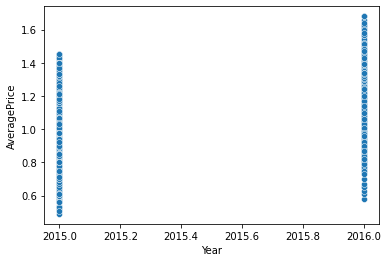

In [12]:
sns.scatterplot(x='Year',y='AveragePrice',data=df_avocado)

Yearly Average Price is higher 2016 as compaired to 2015.

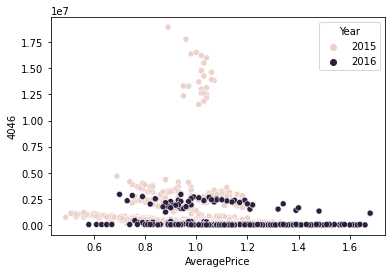

In [13]:
sns.scatterplot(x='AveragePrice',y='4046',hue='Year',data=df_avocado)

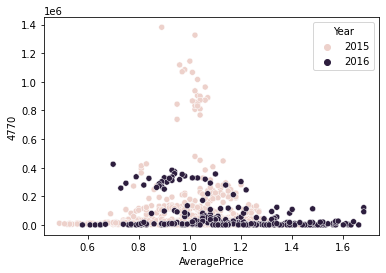

In [14]:
sns.scatterplot(x='AveragePrice',y='4770',hue='Year',data=df_avocado)

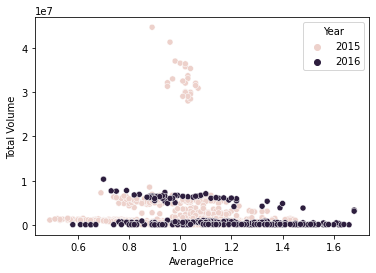

In [15]:
sns.scatterplot(x='AveragePrice',y='Total Volume',hue='Year',data=df_avocado)

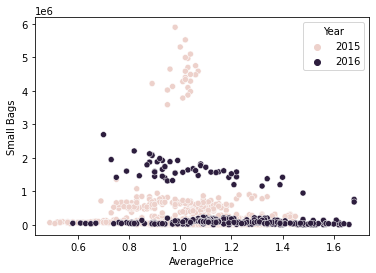

In [16]:
sns.scatterplot(x='AveragePrice',y='Small Bags',hue='Year',data=df_avocado)

In [17]:
pip install -U dataprep

Requirement already up-to-date: dataprep in /usr/local/lib/python3.7/dist-packages (0.3.0)


DataPrep Report
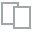
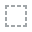
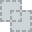
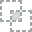
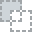
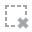
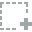
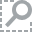
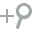
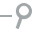
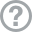
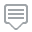
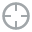
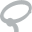
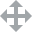
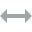
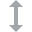
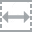
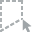
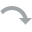
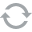
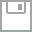
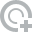
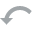
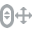
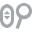
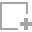
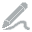
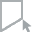
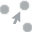
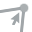
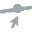

In [18]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df_avocado)

All EDA of dataset and analysis is displayed in one code usng datapred.

In [19]:
print(df_avocado.skew())
print("Total count of numeric features: ",len(df_avocado.skew()))
print("count of features which are significantly skewed: ",len(df_avocado.skew().loc[abs(df_avocado.skew())>0.5]))

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Year            1.828332
Month           0.101439
Day             0.041303
dtype: float64
Total count of numeric features:  12
count of features which are significantly skewed:  9


As per aboveb there are 9 features which are significantly skewed over 12  numeric features.

In [20]:
import numpy as np
for index in df_avocado.skew().index:
    if df_avocado.skew().loc[index]>0.5:
        df_avocado[index]=np.log1p(df_avocado[index])
    if df_avocado.skew().loc[index]<-0.5:
        df_avocado[index]=np.square(df_avocado[index])
print(df_avocado.skew())
print("Total count of numeric features: ",len(df_avocado.skew()))
print("count of features which are significantly skewed: ",len(df_avocado.skew().loc[abs(df_avocado.skew())>0.5]))

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags      0.166210
XLarge Bags     0.783913
Year            1.828332
Month           0.101439
Day             0.041303
dtype: float64
Total count of numeric features:  12
count of features which are significantly skewed:  5


After skewed there are 5 features which are significantly skewed over 12 numeric features.

In [21]:
from scipy.stats import zscore
z_score=abs(zscore(df_avocado))
print(df_avocado.shape)
df_avocado_final=df_avocado.loc[(z_score<3).all(axis=1)]
print(df_avocado_final.shape)

(1517, 12)
(1502, 12)


After removing outlier there are 15 rows are removed from dataset.

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_avocado_final)
df_avocado=sc.transform(df_avocado_final)
df_avocado=pd.DataFrame(df_avocado,columns=df_avocado_final.columns)

Scalled dataset in same scale.

In [23]:
df_avocado

AveragePrice  Total Volume      4046  ...      Year     Month       Day
0         1.365422     -1.375936 -1.840250  ... -0.439329  1.620539  1.311261
1         1.472497     -1.488857 -2.027012  ... -0.439329  1.620539  0.529841
2        -0.776081     -0.938549 -1.955687  ... -0.439329  1.620539 -0.251580
3         0.026983     -1.227667 -1.802077  ... -0.439329 -0.106350 -0.363211
4         1.097734     -1.540837 -1.882102  ... -0.439329  1.332724  1.534524
...            ...           ...       ...  ...       ...       ...       ...
1497      1.686648     -0.595137 -0.094975  ...  2.276196  1.044909  0.083315
1498      2.329099     -0.644155 -0.218216  ...  2.276196  0.757095 -0.586474
1499      2.168486     -0.643451 -0.188752  ...  2.276196 -1.257609 -0.586474
1500      2.114948     -0.601608 -0.121601  ...  2.276196  0.757095  1.087998
1501      1.900798     -0.625325 -0.220323  ...  2.276196  0.757095  0.306578

[1502 rows x 12 columns]

In [24]:
x=df_avocado.drop(['AveragePrice'], axis=1)
y=df_avocado[['AveragePrice']]
print((x.shape),(y.shape))

(1502, 11) (1502, 1)


Seprate indepandent and dependent value from dataset.

### Feature Importance


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

Try to find out most important Feature from all feature.

In [26]:
print(model.feature_importances_)

[0.11478628 0.34324216 0.09555429 0.08967508 0.0716826  0.07171193
 0.06040987 0.05806095 0.04981401 0.02609449 0.01896835]


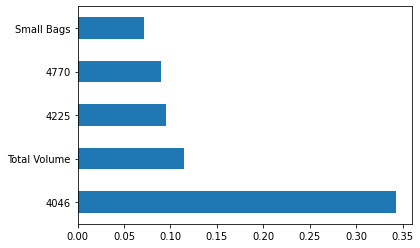

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Displayed there are 5 most important features of dataset.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.4342892301688851
r2_score corresponding to random state:  43  is:  0.3937485717104209
r2_score corresponding to random state:  44  is:  0.300356848890064
r2_score corresponding to random state:  45  is:  0.4096624321160568
r2_score corresponding to random state:  46  is:  0.4165009943346619
r2_score corresponding to random state:  47  is:  0.39309310909435413
r2_score corresponding to random state:  48  is:  0.3585905465106539
r2_score corresponding to random state:  49  is:  0.37371583780460116
r2_score corresponding to random state:  50  is:  0.39289579457361423
r2_score corresponding to random state:  51  is:  0.3963150204848942
r2_score corresponding to random state:  52  is:  0.39351657530703144
r2_score corresponding to random state:  53  is:  0.34315102381407425
r2_score corresponding to random state:  54  is:  0.41750244985944696
r2_score corresponding to random state:  55  is:  0.37705452552415597
r2_score corresponding to ra

Using LinearRegression model found max r2 score corresponding to  96  is  0.4539547352476896

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

0.13914356237691416

In [30]:
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings("ignore") 
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    svr = SVR()
    svr.fit(x_train,y_train)
    y_pred = svr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.7097315037852991
r2_score corresponding to random state:  43  is:  0.6669283135109477
r2_score corresponding to random state:  44  is:  0.5712181045756839
r2_score corresponding to random state:  45  is:  0.6563562981411897
r2_score corresponding to random state:  46  is:  0.7001704582976241
r2_score corresponding to random state:  47  is:  0.6969325078580799
r2_score corresponding to random state:  48  is:  0.6473932634274482
r2_score corresponding to random state:  49  is:  0.6495588803828245
r2_score corresponding to random state:  50  is:  0.7094388515020845
r2_score corresponding to random state:  51  is:  0.6914600338115577
r2_score corresponding to random state:  52  is:  0.6238970744435303
r2_score corresponding to random state:  53  is:  0.7006221332495424
r2_score corresponding to random state:  54  is:  0.6750786467017805
r2_score corresponding to random state:  55  is:  0.684787915854428
r2_score corresponding to random st

Using SVR model found max r2 score corresponding to  95  is  0.7386355073907943

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, x, y, cv=5,scoring="r2").mean()

0.3465609037830456

In [32]:
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred = rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.8092146021912549
r2_score corresponding to random state:  43  is:  0.781648267634001
r2_score corresponding to random state:  44  is:  0.7707828595998761
r2_score corresponding to random state:  45  is:  0.7658035084014975
r2_score corresponding to random state:  46  is:  0.8174379121943496
r2_score corresponding to random state:  47  is:  0.837995807802493
r2_score corresponding to random state:  48  is:  0.7926774184737058
r2_score corresponding to random state:  49  is:  0.7793817945953617
r2_score corresponding to random state:  50  is:  0.790405545851008
r2_score corresponding to random state:  51  is:  0.7927038316601254
r2_score corresponding to random state:  52  is:  0.7782398085068456
r2_score corresponding to random state:  53  is:  0.7991228599998522
r2_score corresponding to random state:  54  is:  0.7804294446005997
r2_score corresponding to random state:  55  is:  0.7988408839741191
r2_score corresponding to random stat

Using RandomForestRegressor model found max r2 score corresponding to  95  is  0.7386355073907943

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr, x, y, cv=5,scoring="r2").mean()

0.23369313648788825

In [34]:
from sklearn.neighbors import KNeighborsRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.7191894844379814
r2_score corresponding to random state:  43  is:  0.700808361938239
r2_score corresponding to random state:  44  is:  0.599731229031855
r2_score corresponding to random state:  45  is:  0.6211434759710703
r2_score corresponding to random state:  46  is:  0.6523630194926455
r2_score corresponding to random state:  47  is:  0.6715292395475125
r2_score corresponding to random state:  48  is:  0.6948205734720294
r2_score corresponding to random state:  49  is:  0.6308608232859707
r2_score corresponding to random state:  50  is:  0.670110909984271
r2_score corresponding to random state:  51  is:  0.687323147528011
r2_score corresponding to random state:  52  is:  0.6098540864177834
r2_score corresponding to random state:  53  is:  0.6979309932497666
r2_score corresponding to random state:  54  is:  0.6837159068827312
r2_score corresponding to random state:  55  is:  0.7127703091292655
r2_score corresponding to random state

Using KNN model found max r2 score corresponding to  95  is  0.7454640014004318


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x, y, cv=5,scoring="r2").mean()

0.16745968462128566

In [36]:
from sklearn.tree import DecisionTreeRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    dr=DecisionTreeRegressor()
    dr.fit(x_train,y_train)
    y_pred = dr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.6636070885605404
r2_score corresponding to random state:  43  is:  0.5600034335371851
r2_score corresponding to random state:  44  is:  0.5328578461799764
r2_score corresponding to random state:  45  is:  0.4346034083809872
r2_score corresponding to random state:  46  is:  0.6977917334154491
r2_score corresponding to random state:  47  is:  0.6476865793279397
r2_score corresponding to random state:  48  is:  0.6349483963643475
r2_score corresponding to random state:  49  is:  0.5621060904644046
r2_score corresponding to random state:  50  is:  0.6608629426866037
r2_score corresponding to random state:  51  is:  0.5876960276579344
r2_score corresponding to random state:  52  is:  0.6663787727014763
r2_score corresponding to random state:  53  is:  0.6393958445588107
r2_score corresponding to random state:  54  is:  0.6903232591511268
r2_score corresponding to random state:  55  is:  0.627082523998033
r2_score corresponding to random st

Using DT model found max r2 score corresponding to  94  is  0.7050759193958136


In [37]:
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500]
min_samples_split=[2,5,8]
min_samples_leaf=[1,2,4]
parameters={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, cv=3)
clf.fit(x,y)
clf.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}

In [38]:
#since maximum r2 score is comming around random state 47 we will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 47,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=100,min_samples_leaf=4,min_samples_split=8)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [39]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.813482223932223
RMSE is :  0.41824380615916207


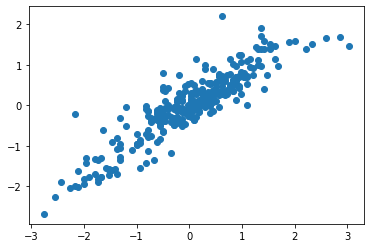

In [40]:
plt.scatter(y_test,y_pred)

As per aboveb displayed test and prediction data are linearly displayed.

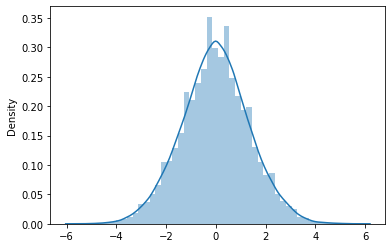

In [41]:
predictions=dr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

As per aboveb prediction and test are normally distrubuted.

In [42]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(rfr, 'rfr_Avacado.obj')
pickle.dump(rfr,open('rfr_Avacado.pkl','wb'))

Dump the module using both pickle and joblib.